In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()
trn_images,valid_images, trn_labels,valid_labels = train_test_split(train_images,train_labels,train_size=0.75,random_state=1)

In [3]:
trn_images = trn_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images /255.0

In [4]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[28,28]))
model1.add(keras.layers.Dense(300,activation="relu"))
model1.add(keras.layers.Dense(10,activation="softmax"))

In [5]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[28,28]))
model2.add(keras.layers.Dense(300,activation="relu"))
model2.add(keras.layers.Dense(10,activation="softmax"))

In [6]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [7]:
history = model1.fit(trn_images,trn_labels,epochs=50,validation_data=(valid_images,valid_labels))

Epoch 1/50
1407/1407 [==============================] - 5s 3ms/step - loss: 0.5101 - accuracy: 0.8221 - val_loss: 0.4309 - val_accuracy: 0.8431
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3796 - accuracy: 0.8617 - val_loss: 0.3517 - val_accuracy: 0.8738
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3391 - accuracy: 0.8751 - val_loss: 0.3581 - val_accuracy: 0.8672
Epoch 4/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3120 - accuracy: 0.8835 - val_loss: 0.3459 - val_accuracy: 0.8765
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2930 - accuracy: 0.8922 - val_loss: 0.3287 - val_accuracy: 0.8817
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2777 - accuracy: 0.8974 - val_loss: 0.3090 - val_accuracy: 0.8889
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2615 - accuracy: 0.9019 - val_loss: 0.3222 - val_accuracy:

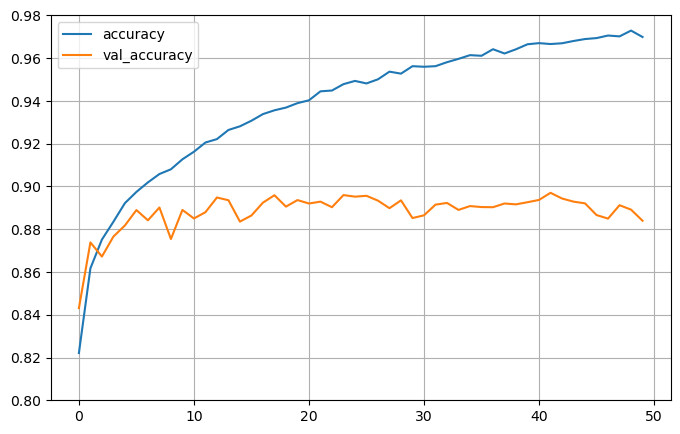

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.DataFrame(history.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.8,0.98) # set the vertical range to [0.5-1]
plt.show()

In [9]:
model1.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.6127 - accuracy: 0.8830


[0.6126837134361267, 0.8830000162124634]

In [10]:
callback = tf.keras.callbacks.EarlyStopping(patience=4,restore_best_weights=True)
history1 = model2.fit(trn_images,trn_labels,epochs=50,validation_data=(valid_images,valid_labels),callbacks=[callback])

Epoch 1/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.5074 - accuracy: 0.8203 - val_loss: 0.4218 - val_accuracy: 0.8473
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3797 - accuracy: 0.8633 - val_loss: 0.3818 - val_accuracy: 0.8599
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3389 - accuracy: 0.8746 - val_loss: 0.3431 - val_accuracy: 0.8752
Epoch 4/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.3138 - accuracy: 0.8826 - val_loss: 0.3247 - val_accuracy: 0.8833
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2922 - accuracy: 0.8908 - val_loss: 0.3361 - val_accuracy: 0.8816
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2770 - accuracy: 0.8956 - val_loss: 0.3092 - val_accuracy: 0.8891
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2616 - accuracy: 0.9018 - val_loss: 0.3077 - val_accuracy:

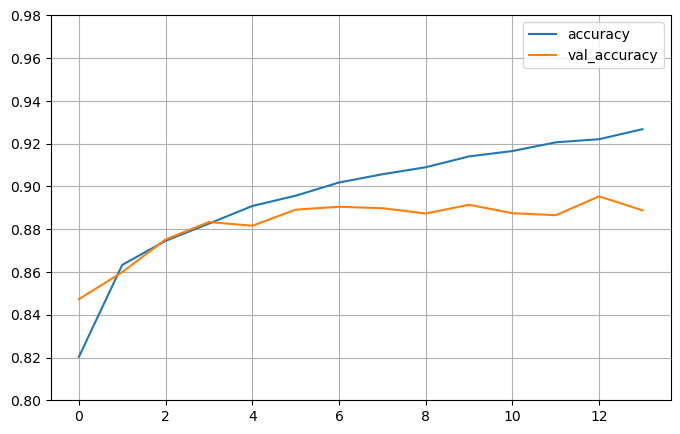

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.DataFrame(history1.history)
ind=[1,3]
df.iloc[:,ind].plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0.8,0.98) # set the vertical range to [0.5-1]
plt.show()

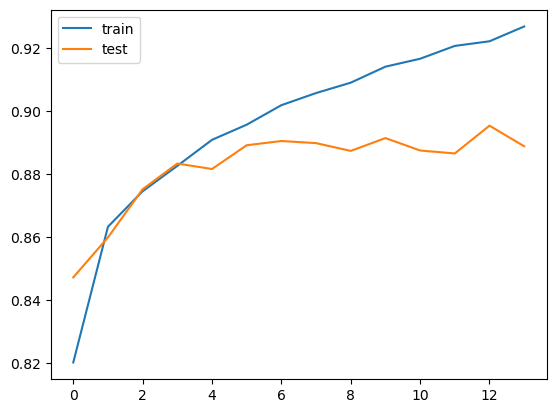

In [13]:
from matplotlib import pyplot
pyplot.plot(history1.history['accuracy'],label='train')
pyplot.plot(history1.history['val_accuracy'],label='test')
pyplot.legend()

In [14]:
model2.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3277 - accuracy: 0.8872


[0.3276740312576294, 0.8871999979019165]